In [80]:
# run `pip install filterpy` if filterpy is not installed

import filterpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta

# only use a single touch
touchId = 33

filterpy.__version__

df = pd.read_csv('dataset/emulator_straight-line.csv', sep=',')
# replace line ending separator
df = df.replace({r';': ''}, regex=True)
df = df[df['TouchId'] == touchId]
# replace line separator in keys
df['Time'] = pd.to_numeric(df[' Time;'])
df = df.drop(" Time;", axis='columns')

# convert .NET timestamp to python timestamp (use apply, as pandas uses nanoseconds for timestamps and does not have the sufficient time range)
df['Date'] = pd.to_datetime(df['Time'].apply(lambda t: datetime(1,1,1) + timedelta(microseconds=t//10)))

# convert to tim difference in ms
start = df['Date'][0]
df['Time_Diff_ms'] = pd.to_numeric(df['Date'] - start) // 1000000

# remove duplicate entries based on time stamp and reset index
df = df.drop_duplicates(subset='Time_Diff_ms', keep='first').reset_index()

display(df)

,index,TouchId,PosX,PosY,PosZ,IsValid,IsFiltered,Time,Date,Time_Diff_ms
0,0,33,0.070276,0.571278,-0.001342,undefined,undefined,638382572003789700,2023-12-15 17:13:20.378970,0
1,1,33,0.070276,0.571278,-0.001342,undefined,undefined,638382572004259500,2023-12-15 17:13:20.425950,46
2,2,33,0.070276,0.518963,-0.007640,undefined,undefined,638382572004728200,2023-12-15 17:13:20.472820,93
3,4,33,0.070276,0.518963,-0.007640,undefined,undefined,638382572005198500,2023-12-15 17:13:20.519850,140
4,6,33,0.070276,0.518963,-0.007640,undefined,undefined,638382572005660400,2023-12-15 17:13:20.566040,187
5,8,33,0.070276,0.518963,-0.007640,undefined,undefined,638382572006141300,2023-12-15 17:13:20.614130,235
6,10,33,0.070276,0.502222,-0.028992,undefined,undefined,638382572006749400,2023-12-15 17:13:20.674940,295
7,12,33,0.070276,0.502222,-0.028992,undefined,undefined,638382572007216400,2023-12-15 17:13:20.721640,342
8,14,33,0.070276,0.502222,-0.028992,undefined,undefined,638382572007693600,2023-12-15 17:13:20.769360,390
9,16,33,0.070276,0.502222,-0.028992,undefined,undefined,638382572008162400,2023-12-15 17:13:20.816240,437


<AxesSubplot:xlabel='Time_Diff_ms', ylabel=' PosX'>

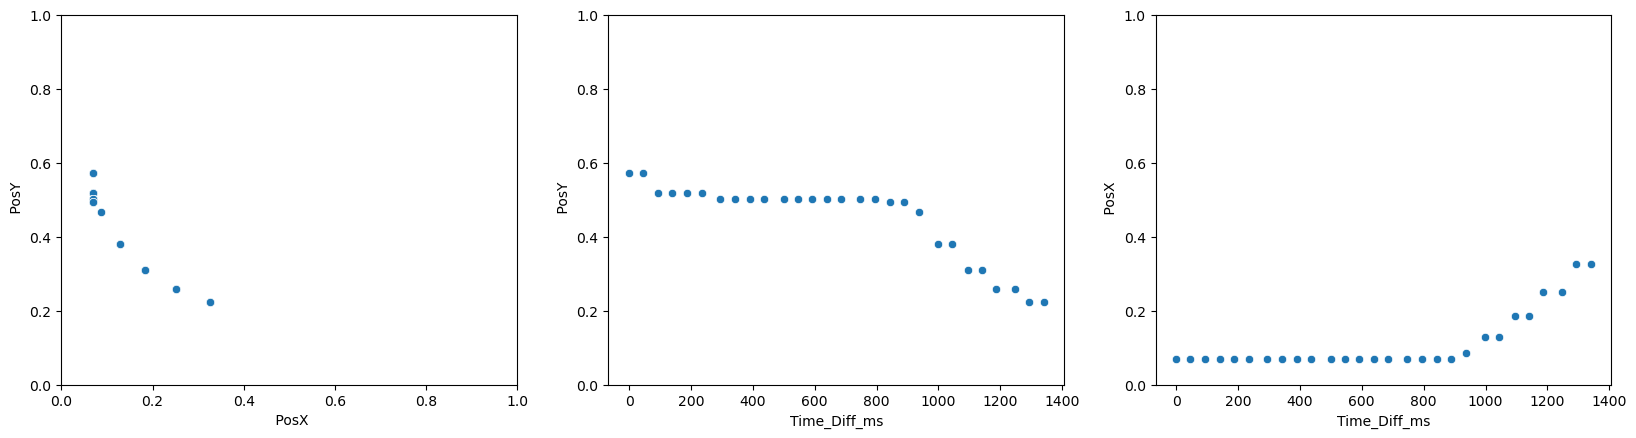

In [90]:
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(20)

axs[0].set_ylim(0,1)
axs[1].set_ylim(0,1)
axs[2].set_ylim(0,1)

axs[0].set_xlim(0,1)

sns.scatterplot(data=df, x=" PosX", y=" PosY", ax = axs[0])
sns.scatterplot(data=df, x="Time_Diff_ms", y=" PosY",  ax = axs[1])
sns.scatterplot(data=df, x="Time_Diff_ms", y=" PosX", ax = axs[2])
